In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. loading data

In [3]:
df= pd.read_csv('DDH Data.csv')
df

,Compound No.,SMILES,pIC50 (IC50 in microM),Unnamed: 3
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255,NaN
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1,NaN
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685,NaN
3,4,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,BLINDED,NaN
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036,NaN
...,...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395,NaN
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023,NaN
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862,NaN
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278,NaN


In [4]:
df = df.drop(labels = 'Unnamed: 3', axis=1)
df

# pIC50 (IC50 in microM) is target data, means the dose amount of compunnds to show effective as a drug.

,Compound No.,SMILES,pIC50 (IC50 in microM)
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685
3,4,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,BLINDED
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036
...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Compound No.            104 non-null    int64 
 1   SMILES                  104 non-null    object
 2   pIC50 (IC50 in microM)  104 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [6]:
df['pIC50 (IC50 in microM)'].unique()

# 'what does 'BLINDED' mean? anyway remove it.

array(['-0.477121255', '-1', '-1.041392685', 'BLINDED', '-1.146128036',
       '-1.176091259', '-1.477121255', '-1.602059991', '-1.653212514',
       '-1.77815125', '-2', '-2.301029996', '-2.397940009',
       '-2.477121255', '-2.544068044', '-2.602059991', '-2.698970004',
       '-1.394451681', '-1.324282455', '-2.35545152', '-1.587710965',
       '-1.158362492', '0.522878745', '0.045757491', '-0.77815125',
       '-1.079181246', '-1.113943352', '-1.204119983', '-1.397940009',
       '-0.698970004', '-1.255272505', '-1.301029996', '1.200659451',
       '1.22184875', '0.681936665', '0.301029996', '0.785156152',
       '0.156767222', '0.477555766', '0.164943898', '0.906578315',
       '0.966576245', '-1.501196242', '-1.50623436', '-1.542949849',
       '-1.003029471', '-1.710371264', '-1.102433706', '-0.071882007',
       '-0.352182518', '-0.633468456', '-1.072984745', '-1.827369273',
       '-0.996073654', '-1.14176323', '-0.017033339', '-1.2509077',
       '-0.450249108', '-1.91860691

In [7]:
sum(df['pIC50 (IC50 in microM)']=='BLINDED')
# checking how many BLINDED are there

10

In [8]:
df = df[df['pIC50 (IC50 in microM)']!='BLINDED']
df

,Compound No.,SMILES,pIC50 (IC50 in microM)
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036
5,6,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,-1.176091259
...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278


In [9]:
# load the data with properties

df_property = pd.read_csv('DDH Data with Properties.csv')
df_property

# 104 rows × 40 columns 



,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,11796320,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,C17H10INO2S,419.2,InChI=1S/C17H10INO2S/c18-11-5-6-14-13(8-11)16(...,MAYSJMBSILUGEG-UHFFFAOYSA-N,"1-(1-benzothiophen-2-ylmethyl)-5-iodoindole-2,...",4.1,418.947700,418.947700,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,2.2,10.0,0.022276395
100,44398344,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,C17H10ClNO2S,327.8,InChI=1S/C17H10ClNO2S/c18-12-5-3-6-13-15(12)16...,VCHRPHJPXICPGC-UHFFFAOYSA-N,1-(1-benzothiophen-2-ylmethyl)-4-chloroindole-...,4.1,327.012077,327.012077,...,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0,-1.049218023
101,44398231,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,C19H12INO2S,445.3,InChI=1S/C19H12INO2S/c20-13-7-8-16-15(11-13)18...,ULTYNOLOPCCXGD-HWKANZROSA-N,1-[(E)-3-(1-benzothiophen-2-yl)prop-2-enyl]-5-...,4.7,444.963350,444.963350,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,3.2,10.0,-1.371067862
102,44398546,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,C20H12ClIN2O3S,522.7,InChI=1S/C20H12ClIN2O3S/c21-11-1-4-13(5-2-11)2...,QLHBUHQTCJSYDO-UHFFFAOYSA-N,"N-(4-chlorophenyl)-5-[(5-iodo-2,3-dioxoindol-1...",4.6,521.930190,521.930190,...,3.0,1.0,0.0,0.0,4.0,1.0,0.8,5.2,10.0,-1.099335278


In [10]:
df_property.T

# have SMILES, pIC50 columns

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
CID,2744814,2821293,2820912,2820914,2744846,2745617,2745640,2745653,16075059,135411083,...,44398167,44398055,44398343,11667869,44398207,11796320,44398344,44398231,44398546,44398436
SMILES,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,...,IC1=CC=C2N(CC3COC4=C(O3)C=CC=C4)C(=O)C(=O)C2=C1,O=C1N(CC2=CC3=CC=CC=C3S2)C2=CC=CC=C2C1=O,[O-][N+](=O)C1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=...,BrC1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=CC=C1,FC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,IC1=CC=C2N(CC3=CC=C(S3)C(=O)N3CCCCC3)C(=O)C(=O...
MolecularFormula,C21H14Cl2N4OS2,C21H15ClF3N5OS2,C22H19ClN4OS4,C22H19ClN4OS4,C19H14ClN5OS3,C21H15ClN4O2S,C22H13Cl2F3N4O2S,C21H14Cl2N4O2S,C15H15Cl2N3OS,C20H17N5O5S2,...,C17H12INO4,C17H11NO2S,C17H10N2O4S,C17H10BrNO2S,C17H10FNO2S,C17H10INO2S,C17H10ClNO2S,C19H12INO2S,C20H12ClIN2O3S,C19H17IN2O3S
MolecularWeight,473.4,510.0,519.1,519.1,460.0,422.9,525.3,457.3,356.3,471.5,...,421.18,293.3,338.3,372.2,311.3,419.2,327.8,445.3,522.7,480.3
InChI,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,InChI=1S/C21H15ClN4O2S/c22-15-6-8-16(9-7-15)24...,InChI=1S/C22H13Cl2F3N4O2S/c23-13-3-6-15(16(24)...,InChI=1S/C21H14Cl2N4O2S/c22-13-5-7-14(8-6-13)2...,InChI=1S/C15H15Cl2N3OS/c1-2-3-12-8-13(17)20-15...,InChI=1S/C20H17N5O5S2/c1-30-14-4-2-3-12(9-14)1...,...,InChI=1S/C17H12INO4/c18-10-5-6-13-12(7-10)16(2...,InChI=1S/C17H11NO2S/c19-16-13-6-2-3-7-14(13)18...,InChI=1S/C17H10N2O4S/c20-16-12-5-3-6-13(19(22)...,InChI=1S/C17H10BrNO2S/c18-13-6-3-5-12-15(13)19...,InChI=1S/C17H10FNO2S/c18-11-5-6-14-13(8-11)16(...,InChI=1S/C17H10INO2S/c18-11-5-6-14-13(8-11)16(...,InChI=1S/C17H10ClNO2S/c18-12-5-3-6-13-15(12)16...,InChI=1S/C19H12INO2S/c20-13-7-8-16-15(11-13)18...,InChI=1S/C20H12ClIN2O3S/c21-11-1-4-13(5-2-11)2...,InChI=1S/C19H17IN2O3S/c20-12-4-6-15-14(10-12)1...
InChIKey,LILOEJREEQFTPM-UHFFFAOYSA-N,AWQBIBTZJKFLEW-UHFFFAOYSA-N,WRXXISITJDZVCL-UHFFFAOYSA-N,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,JEZYTEDGOJCVQS-UHFFFAOYSA-N,TUBDEXWKZSAMKH-UHFFFAOYSA-N,QECWOSUSNVKLGQ-UHFFFAOYSA-N,UQVHELVNDYDRGX-UHFFFAOYSA-N,QQDZEEDSNCOQLW-UHFFFAOYSA-N,MFBIUOFKXQKEGQ-UHFFFAOYSA-N,...,CDKFEFPWJYFQEG-UHFFFAOYSA-N,QGWPMYZWJXKBHT-UHFFFAOYSA-N,BEXUOOJPJCTWKL-UHFFFAOYSA-N,UFOWXDUBQLPEOX-UHFFFAOYSA-N,ANYDLXSQWBLIIK-UHFFFAOYSA-N,MAYSJMBSILUGEG-UHFFFAOYSA-N,VCHRPHJPXICPGC-UHFFFAOYSA-N,ULTYNOLOPCCXGD-HWKANZROSA-N,QLHBUHQTCJSYDO-UHFFFAOYSA-N,FJXCZSNZFQISSC-UHFFFAOYSA-N
IUPACName,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...","N-(4-chlorophenyl)-2-[4-(3-phenyl-1,2-oxazol-5...","2-[4-[3-(2,4-dichlorophenyl)-1,2-oxazol-5-yl]p...","N-(4-chlorophenyl)-2-[4-[3-(2-chlorophenyl)-1,...",N-(4-chlorophenyl)-2-(4-chloro-6-propylpyrimid...,2-[[5-cyano-4-(3-methoxyphenyl)-6-oxo-1H-pyrim...,...,"1-(2,3-dihydro-1,4-benzodioxin-3-ylmethyl)-5-i...","1-(1-benzothiophen-2-ylmethyl)indole-2,3-dione",1-(1-benzothiophen-2-ylmethyl)-7-nitroindole-2...,1-(1-benzothiophen-2-ylmethyl)-7-bromoindole-2...,1-(1-benzothiophen-2-ylmethyl)-5-fluor

In [11]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       104 non-null    int64  
 1   SMILES                    104 non-null    object 
 2   MolecularFormula          104 non-null    object 
 3   MolecularWeight           104 non-null    float64
 4   InChI                     104 non-null    object 
 5   InChIKey                  101 non-null    object 
 6   IUPACName                 101 non-null    object 
 7   XLogP                     101 non-null    float64
 8   ExactMass                 101 non-null    float64
 9   MonoisotopicMass          101 non-null    float64
 10  TPSA                      101 non-null    float64
 11  Complexity                101 non-null    float64
 12  Charge                    101 non-null    float64
 13  HBondDonorCount           101 non-null    float64
 14  HBondAccep

In [12]:
df_property.describe().T

# has features

,count,mean,std,min,25%,50%,75%,max
CID,104.0,3.539089e+07,4.443420e+07,0.000000,2.799801e+06,1.393569e+07,7.305647e+07,1.354276e+08
MolecularWeight,104.0,3.678680e+02,1.004881e+02,0.000000,3.090925e+02,3.708500e+02,4.314250e+02,5.886000e+02
XLogP,101.0,3.207921e+00,1.609763e+00,-0.600000,2.200000e+00,3.400000e+00,4.300000e+00,7.300000e+00
ExactMass,101.0,3.782613e+02,7.875694e+01,212.007805,3.101205e+02,3.720892e+02,4.341049e+02,5.881778e+02
MonoisotopicMass,101.0,3.782218e+02,7.869575e+01,212.007805,3.101205e+02,3.720892e+02,4.338459e+02,5.881778e+02
TPSA,101.0,1.010178e+02,3.497450e+01,34.100000,8.310000e+01,9.690000e+01,1.200000e+02,1.970000e+02
Complexity,101.0,5.763366e+02,1.566483e+02,242.000000,4.740000e+02,5.540000e+02,6.700000e+02,9.600000e+02
Charge,101.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HBondDonorCount,101.0,6.930693e-01,7.967757e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
HBondAcceptorCount,101.0,5.732673e+00,1.859522e+00,2.000000,5.000000e+00,6.000000e+00,6.000000e+00,1.200000e+01


# 2. merge data frame 

In [13]:
df = pd.merge(df, df_property, on = 'SMILES', how = 'left')
df
# 94 rows × 42 columns

,Compound No.,SMILES,pIC50 (IC50 in microM),CID,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255,2744814,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1,2821293,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685,2820912,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036,2744846,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
4,6,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,-1.176091259,2745617,C21H15ClN4O2S,422.9,InChI=1S/C21H15ClN4O2S/c22-15-6-8-16(9-7-15)24...,TUBDEXWKZSAMKH-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-(3-phenyl-1,2-oxazol-5...",4.4,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395,11796320,C17H10INO2S,419.2,InChI=1S/C17H10INO2S/c18-11-5-6-14-13(8-11)16(...,MAYSJMBSILUGEG-UHFFFAOYSA-N,"1-(1-benzothiophen-2-ylmethyl)-5-iodoindole-2,...",4.1,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,2.2,10.0,0.022276395
90,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023,44398344,C17H10ClNO2S,327.8,InChI=1S/C17H10ClNO2S/c18-12-5-3-6-13-15(12)16...,VCHRPHJPXICPGC-UHFFFAOYSA-N,1-(1-benzothiophen-2-ylmethyl)-4-chloroindole-...,4.1,...,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0,-1.049218023
91,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862,44398231,C19H12INO2S,445.3,InChI=1S/C19H12INO2S/c20-13-7-8-16-15(11-13)18...,ULTYNOLOPCCXGD-HWKANZROSA-N,1-[(E)-3-(1-benzothiophen-2-yl)prop-2-enyl]-5-...,4.7,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,3.2,10.0,-1.371067862
92,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278,44398546,C20H12ClIN2O3S,522.7,InChI=1S/C20H12ClIN2O3S/c21-11-1-4-13(5-2-11)2...,QLHBUHQTCJSYDO-UHFFFAOYSA-N,"N-(4-chlorophenyl)-5-[(5-iodo-2,3-dioxoindol-1...",4.6,...,3.0,1.0,0.0,0.0,4.0,1.0,0.8,5.2,10.0,-1.099335278


In [14]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
Compound No.,1,2,3,5,6,7,8,9,10,11,...,94,96,97,98,99,100,101,102,103,104
SMILES,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,CC(C)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC=CS2)C=C1,...,FC1=CC(Cl)=C(CN2C(=O)C(=O)C3=CC(I)=CC=C23)C=C1,O=C1N(CC2=CC3=CC=CC=C3S2)C2=CC=CC=C2C1=O,[O-][N+](=O)C1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=...,BrC1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=CC=C1,FC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,IC1=CC=C2N(CC3=CC=C(S3)C(=O)N3CCCCC3)C(=O)C(=O...
pIC50 (IC50 in microM),-0.477121255,-1,-1.041392685,-1.146128036,-1.176091259,-1.176091259,-1.176091259,-1.477121255,-1.602059991,-1.602059991,...,-0.973127854,-1.117602692,-0.301029996,0.008773924,-0.683047038,0.022276395,-1.049218023,-1.371067862,-1.099335278,-1.243038049
CID,2744814,2821293,2820912,2744846,2745617,2745640,2745653,16075059,135411083,2811874,...,44398002,44398055,44398343,11667869,44398207,11796320,44398344,44398231,44398546,44398436
MolecularFormula,C21H14Cl2N4OS2,C21H15ClF3N5OS2,C22H19ClN4OS4,C19H14ClN5OS3,C21H15ClN4O2S,C22H13Cl2F3N4O2S,C21H14Cl2N4O2S,C15H15Cl2N3OS,C20H17N5O5S2,C19H19N3OS2,...,C15H8ClFINO2,C17H11NO2S,C17H10N2O4S,C17H10BrNO2S,C17H10FNO2S,C17H10INO2S,C17H10ClNO2S,C19H12INO2S,C20H12ClIN2O3S,C19H17IN2O3S
MolecularWeight,473.4,510.0,519.1,460.0,422.9,525.3,457.3,356.3,471.5,369.5,...,415.58,293.3,338.3,372.2,311.3,419.2,327.8,445.3,522.7,480.3
InChI,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,InChI=1S/C21H15ClN4O2S/c22-15-6-8-16(9-7-15)24...,InChI=1S/C22H13Cl2F3N4O2S/c23-13-3-6-15(16(24)...,InChI=1S/C21H14Cl2N4O2S/c22-13-5-7-14(8-6-13)2...,InChI=1S/C15H15Cl2N3OS/c1-2-3-12-8-13(17)20-15...,InChI=1S/C20H17N5O5S2/c1-30-14-4-2-3-12(9-14)1...,InChI=1S/C19H19N3OS2/c1-13(2)14-5-7-15(8-6-14)...,...,InChI=1S/C15H8ClFINO2/c16-12-5-9(17)2-1-8(12)7...,InChI=1S/C17H11NO2S/c19-16-13-6-2-3-7-14(13)18...,InChI=1S/C17H10N2O4S/c20-16-12-5-3-6-13(19(22)...,InChI=1S/C17H10BrNO2S/c18-13-6-3-5-12-15(13)19...,InChI=1S/C17H10FNO2S/c18-11-5-6-14-13(8-11)16(...,InChI=1S/C17H10INO2S/c18-11-5-6-14-13(8-11)16(...,InChI=1S/C17H10ClNO2S/c18-12-5-3-6-13-15(12)16...,InChI=1S/C19H12INO2S/c20-13-7-8-16-15(11-13)18...,InChI=1S/C20H12ClIN2O3S/c21-11-1-4-13(5-2-11)2...,InChI=1S/C19H17IN2O3S/c20-12-4-6-15-14(10-12)1...
InChIKey,LILOEJREEQFTPM-UHFFFAOYSA-N,AWQBIBTZJKFLEW-UHFFFAOYSA-N,WRXXISITJDZVCL-UHFFFAOYSA-N,JEZYTEDGOJCVQS-UHFFFAOYSA-N,TUBDEXWKZSAMKH-UHFFFAOYSA-N,QECWOSUSNVKLGQ-UHFFFAOYSA-N,UQVHELVNDYDRGX-UHFFFAOYSA-N,QQDZEEDSNCOQLW-UHFFFAOYSA-N,MFBIUOFKXQKEGQ-UHFFFAOYSA-N,UUBHDKPSKIQBFE-UHFFFAOYSA-N,...,ZRTPFLLKDJDNGZ-UHFFFAOYSA-N,QGWPMYZWJXKBHT-UHFFFAOYSA-N,BEXUOOJPJCTWKL-UHFFFAOYSA-N,UFOWXDUBQLPEOX-UHFFFAOYSA-N,ANYDLXSQWBLIIK-UHFFFAOYSA-N,MAYSJMBSILUGEG-UHFFFAOYSA-N,VCHRPHJPXICPGC-UHFFFAOYSA-N,ULTYNOLOPCCXGD-HWKANZROSA-N,QLHBUHQTCJSYDO-UHFFFAOYSA-N,FJXCZSNZFQISSC-UHFFFAOYSA-N
IUPACName,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...","N-(4-chlorophenyl)-2-[4-(3-phenyl-1,2-oxazol-5...","2-[4-[3-(2,4-dichlorophenyl)-1,2-oxazol-5-yl]p...","N-(4-chlorophenyl)-2-[4-[3-(2-chlorophenyl)-1,...",N-(4-chlorophenyl)-2-(4-chloro-6-propylpyrimid...,

# 3. Select columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Compound No.              94 non-null     int64  
 1   SMILES                    94 non-null     object 
 2   pIC50 (IC50 in microM)    94 non-null     object 
 3   CID                       94 non-null     int64  
 4   MolecularFormula          94 non-null     object 
 5   MolecularWeight           94 non-null     float64
 6   InChI                     94 non-null     object 
 7   InChIKey                  91 non-null     object 
 8   IUPACName                 91 non-null     object 
 9   XLogP                     91 non-null     float64
 10  ExactMass                 91 non-null     float64
 11  MonoisotopicMass          91 non-null     float64
 12  TPSA                      91 non-null     float64
 13  Complexity                91 non-null     float64
 14  Charge      

In [16]:
df.columns

Index(['Compound No.', 'SMILES', 'pIC50 (IC50 in microM)', 'CID',
       'MolecularFormula', 'MolecularWeight', 'InChI', 'InChIKey', 'IUPACName',
       'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity',
       'Charge', 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
       'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount',
       'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount',
       'DefinedBondStereoCount', 'UndefinedBondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D', 'pIC50'],
      dtype='object')

In [18]:
df = df.drop(['Compound No.', 'pIC50 (IC50 in microM)', 'CID',
       'MolecularFormula', 'InChI', 'InChIKey', 'IUPACName'], axis=1)
#dropping unneccesary features

KeyError: "['Compound No.', 'pIC50 (IC50 in microM)', 'CID', 'MolecularFormula', 'InChI', 'InChIKey', 'IUPACName'] not found in axis"

In [19]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
SMILES,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,CC(C)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC=CS2)C=C1,...,FC1=CC(Cl)=C(CN2C(=O)C(=O)C3=CC(I)=CC=C23)C=C1,O=C1N(CC2=CC3=CC=CC=C3S2)C2=CC=CC=C2C1=O,[O-][N+](=O)C1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=...,BrC1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=CC=C1,FC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,IC1=CC=C2N(CC3=CC=C(S3)C(=O)N3CCCCC3)C(=O)C(=O...
MolecularWeight,473.4,510.0,519.1,460.0,422.9,525.3,457.3,356.3,471.5,369.5,...,415.58,293.3,338.3,372.2,311.3,419.2,327.8,445.3,522.7,480.3
XLogP,5.6,4.9,6.3,4.4,4.4,5.9,5.0,4.7,1.2,4.5,...,3.8,3.4,3.3,4.1,3.5,4.1,4.1,4.7,4.6,3.4
ExactMass,471.998609,509.035865,518.013024,459.004901,422.060425,524.008837,456.021452,355.031289,471.067111,369.096955,...,414.92723,293.05105,338.036128,370.96156,311.041628,418.9477,327.012077,444.96335,521.93019,480.00046
MonoisotopicMass,471.998609,509.035865,518.013024,459.004901,422.060425,524.008837,456.021452,355.031289,471.067111,369.096955,...,414.92723,293.05105,338.036128,370.96156,311.041628,418.9477,327.012077,444.96335,521.93019,480.00046
TPSA,121.0,126.0,175.0,162.0,106.0,106.0,106.0,80.2,197.0,108.0,...,37.4,65.6,111.0,65.6,65.6,65.6,65.6,65.6,94.7,85.9
Complexity,559.0,670.0,627.0,554.0,529.0,687.0,567.0,354.0,955.0,427.0,...,449.0,452.0,563.0,485.0,485.0,485.0,485.0,552.0,643.0,595.0
Charge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HBondDonorCount,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HBondAcceptorCount,6.0,9.0,8.0,8.0,6.0,9.0,6.0,4.0,9.0,5.0,...,3.0,3.0,5.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    94 non-null     object 
 1   MolecularWeight           94 non-null     float64
 2   XLogP                     91 non-null     float64
 3   ExactMass                 91 non-null     float64
 4   MonoisotopicMass          91 non-null     float64
 5   TPSA                      91 non-null     float64
 6   Complexity                91 non-null     float64
 7   Charge                    91 non-null     float64
 8   HBondDonorCount           91 non-null     float64
 9   HBondAcceptorCount        91 non-null     float64
 10  RotatableBondCount        91 non-null     float64
 11  HeavyAtomCount            91 non-null     float64
 12  IsotopeAtomCount          91 non-null     float64
 13  AtomStereoCount           91 non-null     float64
 14  DefinedAtomS

In [21]:
df.pIC50.unique()
# 

array(['-0.477121255', '-1', '-1.041392685', '-1.146128036',
       '-1.176091259', '-1.477121255', '-1.602059991', '-1.653212514',
       '-1.77815125', '-2', '-2.301029996', '-2.397940009',
       '-2.477121255', '-2.544068044', '-2.602059991', '-2.698970004',
       '-1.394451681', '-1.324282455', '-2.35545152', '-1.587710965',
       '-1.158362492', '0.522878745', '0.045757491', '-0.77815125',
       '-1.079181246', '-1.113943352', '-1.204119983', '-1.397940009',
       '-0.698970004', '-1.255272505', '-1.301029996', '1.200659451',
       '1.22184875', '0.681936665', '0.301029996', '0.785156152',
       '0.156767222', '0.477555766', '0.164943898', '0.906578315',
       '0.966576245', '-1.501196242', '-1.50623436', '-1.542949849',
       '-1.003029471', '-1.710371264', '-1.102433706', '-0.071882007',
       '-0.352182518', '-0.633468456', '-1.072984745', '-1.827369273',
       '-0.996073654', '-1.14176323', '-0.017033339', '-1.2509077',
       '-0.450249108', '-1.918606915', '-0.741

In [22]:
df['pIC50'] = pd.to_numeric(df['pIC50'])

df

,SMILES,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,473.4,5.6,471.998609,471.998609,121.0,559.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121
1,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,510.0,4.9,509.035865,509.035865,126.0,670.0,0.0,1.0,9.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1.000000
2,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,519.1,6.3,518.013024,518.013024,175.0,627.0,0.0,1.0,8.0,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041393
3,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,460.0,4.4,459.004901,459.004901,162.0,554.0,0.0,1.0,8.0,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128
4,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,422.9,4.4,422.060425,422.060425,106.0,529.0,0.0,1.0,6.0,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,419.2,4.1,418.947700,418.947700,65.6,485.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,2.2,10.0,0.022276
90,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,327.8,4.1,327.012077,327.012077,65.6,485.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0,-1.049218
91,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,445.3,4.7,444.963350,444.963350,65.6,552.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,3.2,10.0,-1.371068
92,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,522.7,4.6,521.930190,521.930190,94.7,643.0,0.0,1.0,4.0,...,3.0,1.0,0.0,0.0,4.0,1.0,0.8,5.2,10.0,-1.099335


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    94 non-null     object 
 1   MolecularWeight           94 non-null     float64
 2   XLogP                     91 non-null     float64
 3   ExactMass                 91 non-null     float64
 4   MonoisotopicMass          91 non-null     float64
 5   TPSA                      91 non-null     float64
 6   Complexity                91 non-null     float64
 7   Charge                    91 non-null     float64
 8   HBondDonorCount           91 non-null     float64
 9   HBondAcceptorCount        91 non-null     float64
 10  RotatableBondCount        91 non-null     float64
 11  HeavyAtomCount            91 non-null     float64
 12  IsotopeAtomCount          91 non-null     float64
 13  AtomStereoCount           91 non-null     float64
 14  DefinedAtomS

In [24]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    91 non-null     object 
 1   MolecularWeight           91 non-null     float64
 2   XLogP                     91 non-null     float64
 3   ExactMass                 91 non-null     float64
 4   MonoisotopicMass          91 non-null     float64
 5   TPSA                      91 non-null     float64
 6   Complexity                91 non-null     float64
 7   Charge                    91 non-null     float64
 8   HBondDonorCount           91 non-null     float64
 9   HBondAcceptorCount        91 non-null     float64
 10  RotatableBondCount        91 non-null     float64
 11  HeavyAtomCount            91 non-null     float64
 12  IsotopeAtomCount          91 non-null     float64
 13  AtomStereoCount           91 non-null     float64
 14  DefinedAtomStereo

# 4. Exploratory Data Analysis 

In [25]:
df.describe().T

# Charge, IsotopeAtomCount, DefinedAtomStereoCount, UndefinedBondStereoCount, CovalentUnitCount have to remove

,count,mean,std,min,25%,50%,75%,max
MolecularWeight,91.0,376.399231,75.117761,212.300000,313.000000,372.200000,427.500000,565.000000
XLogP,91.0,3.186813,1.564339,-0.600000,2.000000,3.400000,4.100000,7.300000
ExactMass,91.0,375.865712,74.989076,212.007805,312.509024,370.961560,427.132214,563.814325
MonoisotopicMass,91.0,375.821811,74.916248,212.007805,312.509024,370.961560,427.132214,561.817275
TPSA,91.0,99.848352,32.142334,34.100000,83.100000,96.900000,120.000000,197.000000
Complexity,91.0,571.582418,149.089836,242.000000,472.000000,554.000000,669.500000,960.000000
Charge,91.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HBondDonorCount,91.0,0.670330,0.789584,0.000000,0.000000,0.000000,1.000000,3.000000
HBondAcceptorCount,91.0,5.648352,1.695573,2.000000,5.000000,6.000000,6.000000,10.000000
RotatableBondCount,91.0,3.912088,2.025660,0.000000,2.000000,4.000000,5.500000,9.000000


In [26]:
df = df.drop(['Charge', 'IsotopeAtomCount', 'DefinedAtomStereoCount', 
              'UndefinedBondStereoCount', 'CovalentUnitCount'], axis=1)
df.shape

(91, 30)

In [29]:
# correlation chart

corrmat = df.drop(['SMILES'], axis = 1).corr()
corrmat = round(corrmat, 2)
corrmat

,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
MolecularWeight,1.00,0.47,1.00,1.00,0.44,0.71,0.34,0.47,0.67,0.89,...,0.12,0.35,-0.17,0.28,0.41,0.21,0.70,0.72,0.28,-0.25
XLogP,0.47,1.00,0.47,0.47,-0.00,0.02,0.03,-0.06,0.36,0.35,...,-0.46,0.04,-0.03,0.13,0.13,0.39,0.34,0.29,0.01,0.04
ExactMass,1.00,0.47,1.00,1.00,0.44,0.71,0.34,0.47,0.67,0.89,...,0.12,0.35,-0.17,0.28,0.42,0.21,0.70,0.72,0.28,-0.25
MonoisotopicMass,1.00,0.47,1.00,1.00,0.44,0.71,0.34,0.47,0.67,0.89,...,0.12,0.35,-0.17,0.28,0.42,0.21,0.70,0.72,0.28,-0.25
TPSA,0.44,-0.00,0.44,0.44,1.00,0.39,0.58,0.76,0.56,0.46,...,0.47,0.59,0.27,0.25,-0.14,-0.03,0.53,0.63,0.12,-0.30
Complexity,0.71,0.02,0.71,0.71,0.39,1.00,0.33,0.43,0.42,0.85,...,0.42,0.35,-0.22,0.05,0.50,-0.03,0.57,0.53,0.16,-0.34
HBondDonorCount,0.34,0.03,0.34,0.34,0.58,0.33,1.00,0.41,0.59,0.37,...,0.02,0.98,-0.20,0.20,-0.17,0.20,0.56,0.59,0.15,-0.49
HBondAcceptorCount,0.47,-0.06,0.47,0.47,0.76,0.43,0.41,1.00,0.51,0.54,...,0.50,0.43,0.20,0.42,-0.09,-0.31,0.53,0.63,0.18,-0.20
RotatableBondCount,0.67,0.36,0.67,0.67,0.56,0.42,0.59,0.51,1.00,0.70,...,0.06,0.61,-0.22,0.40,0.02,0.09,0.86,0.95,0.51,-0.32
HeavyAtomCount,0.89,0.35,0.89,0.89,0.46,0.85,0.37,0.54,0.70,1.00,...,0.25,0.40,-0.22,0.33,0.53,0.02,0.80,0.78,0.30,-0.33


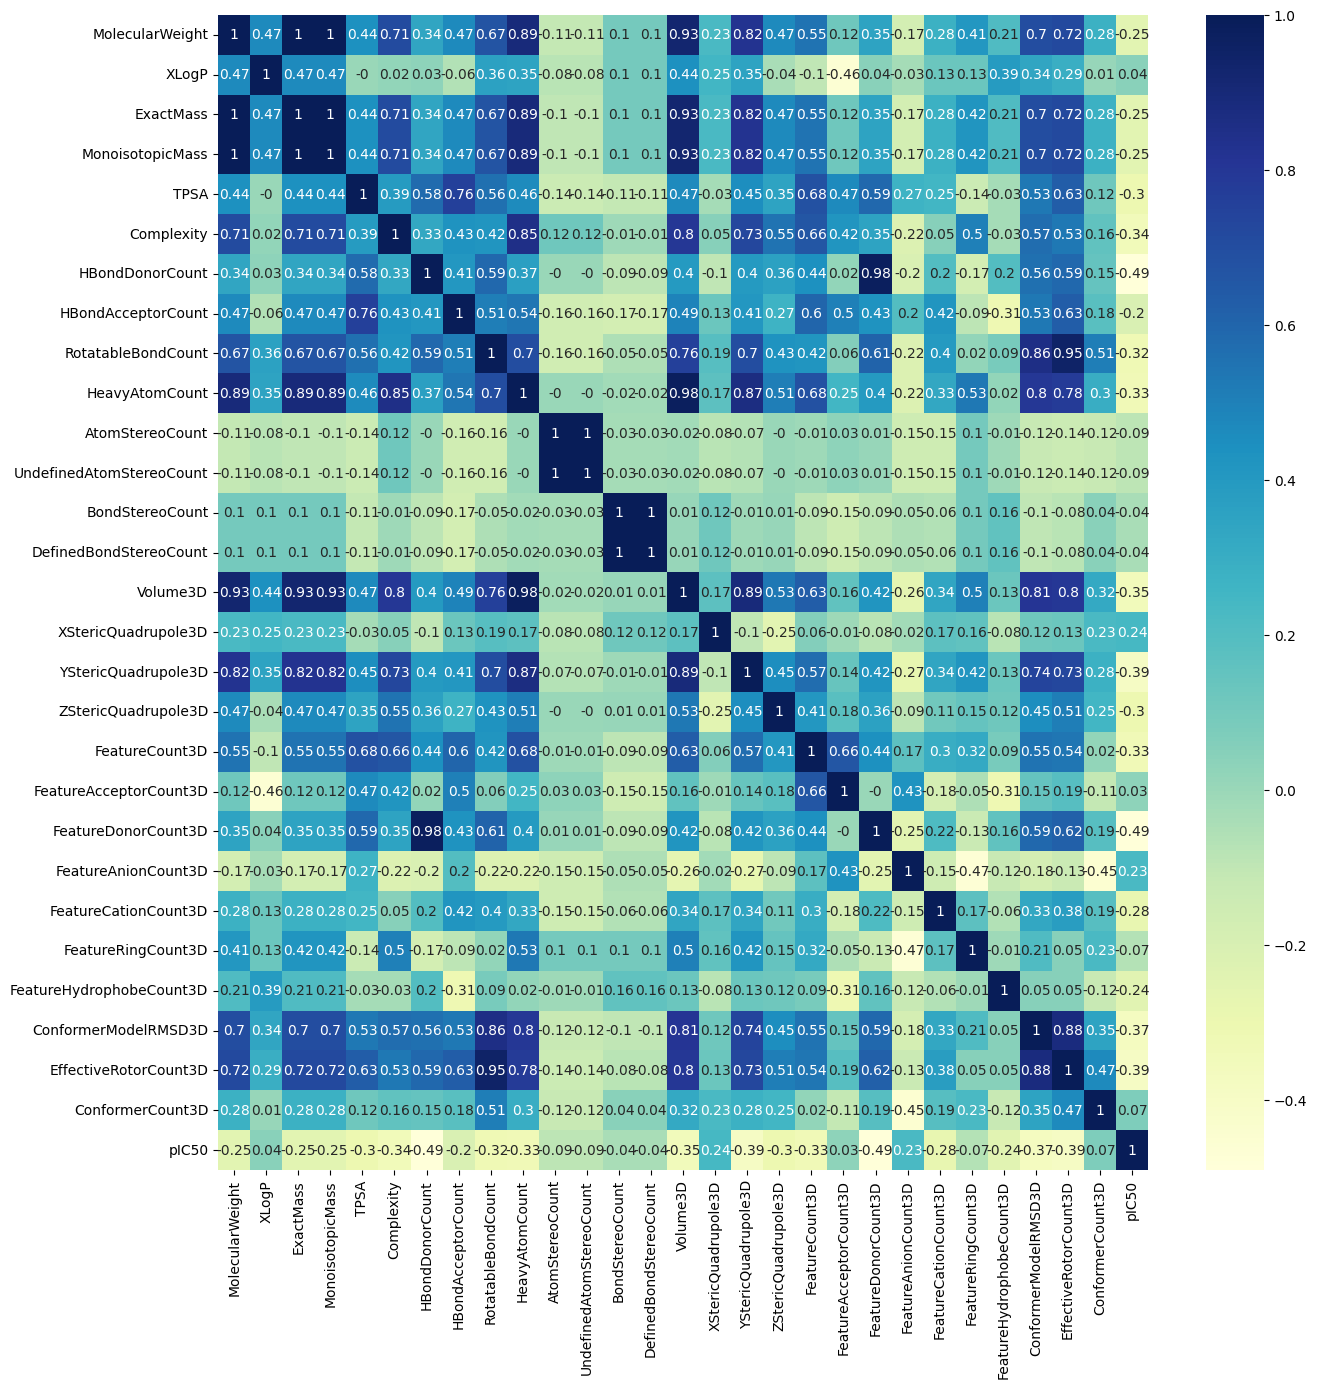

In [34]:
plt.figure(figsize= (15, 15))
sns.heatmap(corrmat, cmap = 'YlGnBu', annot = True)
plt.show()

# 5. data split


In [35]:
target = df['pIC50']
features = df.drop(['SMILES', 'pIC50'], axis=1)
target.shape, features.shape

((91,), (91, 28))

In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

features_scaled = min_max_scaler.fit_transform(features)
features_scaled

array([[0.7402892 , 0.78481013, 0.73901645, ..., 0.5       , 0.68627451,
        1.        ],
       [0.84406011, 0.69620253, 0.84429379, ..., 0.75      , 0.78431373,
        1.        ],
       [0.86986107, 0.87341772, 0.86981111, ..., 0.5       , 0.78431373,
        1.        ],
       ...,
       [0.66061809, 0.67088608, 0.66216949, ..., 0.        , 0.31372549,
        1.        ],
       [0.88006805, 0.65822785, 0.88094554, ..., 0.25      , 0.50980392,
        1.        ],
       [0.75985257, 0.50632911, 0.76176148, ..., 0.25      , 0.52941176,
        1.        ]])

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features_scaled, target, test_size=0.2, random_state=2212)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 28), (19, 28), (72,), (19,))

# 6. Pipeline to compare regression models quickly 

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

In [39]:
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', num_pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [40]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [42]:
names = []
times = []
mses = []
maes = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    print(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    print(end_time - start_time)
    times.append(end_time - start_time)
    mses.append(mean_squared_error(y_test, pred))
    maes.append(mean_absolute_error(y_test, pred))

RandomForestRegressor
0.3814225196838379
AdaBoostRegressor
0.11901402473449707
GradientBoostingRegressor
0.1401534080505371
BaggingRegressor
0.02817058563232422
SVR
0.0
DecisionTreeRegressor
0.0
ExtraTreeRegressor
0.015045166015625
LinearRegression
0.0313870906829834
SGDRegressor
0.01568889617919922
KNeighborsRegressor
0.18745207786560059


# 7. Comparing Regression Models

In [43]:
results_dict = {'Algorithm': names, 'MSE': mses, 'MAE': maes, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)

# SVR is the best algorithm 

,Algorithm,MSE,MAE,Time
4,SVR,0.188553,0.365123,0.000000
0,RandomForestRegressor,0.221169,0.377919,0.381423
2,GradientBoostingRegressor,0.244222,0.351529,0.140153
9,KNeighborsRegressor,0.245489,0.406286,0.187452
3,BaggingRegressor,0.246224,0.406631,0.028171
8,SGDRegressor,0.342725,0.528698,0.015689
1,AdaBoostRegressor,0.349784,0.513483,0.119014
7,LinearRegression,0.401804,0.445180,0.031387
5,DecisionTreeRegressor,0.650199,0.726470,0.000000
6,ExtraTreeRegressor,0.771604,0.745971,0.015045


<Axes: ylabel='pIC50'>

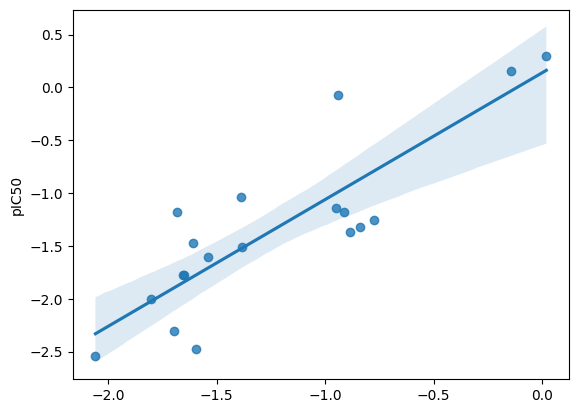

In [44]:
model = prepare_model(SVR(), X_train, y_train)
pred = model.predict(X_test)

sns.regplot(x = pred, y = y_test)

# 8. SVM model

In [45]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
print(svr_mse)

0.6222531621215464
0.6838953739793334
0.18855318713696329


# 9. predicted values and real values of target, pIC50 

<Axes: ylabel='pIC50'>

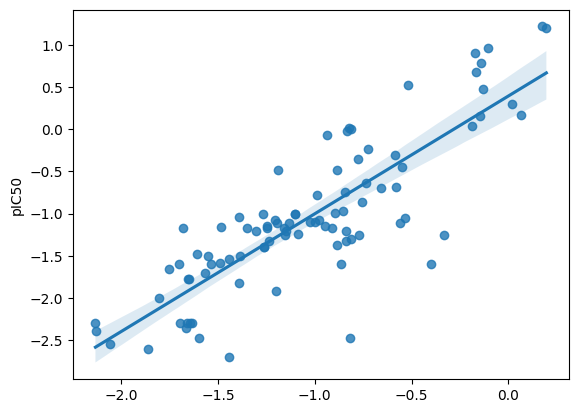

In [46]:
pred = model.predict(features_scaled)

sns.regplot(x = pred, y = target)

# 

# 15. Group pIC50 values into low, medium and high effective

In [50]:
df['pIC50_Group'] = np.where(df['pIC50'] >= -0.683, 'Less_Effective', 
                                    (np.where(df['pIC50'] <= -1.587412, 'High_Effective', 
                                              'Medium_Effective')))
df.T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
SMILES,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,CC(C)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC=CS2)C=C1,...,FC1=CC(Cl)=C(CN2C(=O)C(=O)C3=CC(I)=CC=C23)C=C1,O=C1N(CC2=CC3=CC=CC=C3S2)C2=CC=CC=C2C1=O,[O-][N+](=O)C1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=...,BrC1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=CC=C1,FC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,IC1=CC=C2N(CC3=CC=C(S3)C(=O)N3CCCCC3)C(=O)C(=O...
MolecularWeight,473.4,510.0,519.1,460.0,422.9,525.3,457.3,356.3,471.5,369.5,...,415.58,293.3,338.3,372.2,311.3,419.2,327.8,445.3,522.7,480.3
XLogP,5.6,4.9,6.3,4.4,4.4,5.9,5.0,4.7,1.2,4.5,...,3.8,3.4,3.3,4.1,3.5,4.1,4.1,4.7,4.6,3.4
ExactMass,471.998609,509.035865,518.013024,459.004901,422.060425,524.008837,456.021452,355.031289,471.067111,369.096955,...,414.92723,293.05105,338.036128,370.96156,311.041628,418.9477,327.012077,444.96335,521.93019,480.00046
MonoisotopicMass,471.998609,509.035865,518.013024,459.004901,422.060425,524.008837,456.021452,355.031289,471.067111,369.096955,...,414.92723,293.05105,338.036128,370.96156,311.041628,418.9477,327.012077,444.96335,521.93019,480.00046
TPSA,121.0,126.0,175.0,162.0,106.0,106.0,106.0,80.2,197.0,108.0,...,37.4,65.6,111.0,65.6,65.6,65.6,65.6,65.6,94.7,85.9
Complexity,559.0,670.0,627.0,554.0,529.0,687.0,567.0,354.0,955.0,427.0,...,449.0,452.0,563.0,485.0,485.0,485.0,485.0,552.0,643.0,595.0
HBondDonorCount,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HBondAcceptorCount,6.0,9.0,8.0,8.0,6.0,9.0,6.0,4.0,9.0,5.0,...,3.0,3.0,5.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0
RotatableBondCount,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,7.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0
